In [30]:
import pandas as pd

#loading dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

#showing few coloumns data
print(df.head())


     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [31]:
# taking only necessary coloum
df = df[['v1', 'v2']]

# renaming  columns names to simple understanding
df.columns = ['label', 'message']

# checking noise free datframe
print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [32]:
# lable as ham = 0 spam = 1
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

# checking lables
print(df['label'].value_counts())


label
0    902
1    160
Name: count, dtype: int64


In [33]:
from sklearn.model_selection import train_test_split

# spilting features and labels
X = df['message']
y = df['label']

#  traininf and testing separation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# showing training data and testing data
print("Training samples:", len(X_train))
print("Testing samples:", len(X_test))


Training samples: 849
Testing samples: 213


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# applying tf-idf  vectorization
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# checking data is fit or not
X_train_vec = tfidf.fit_transform(X_train)

# changing the test data
X_test_vec = tfidf.transform(X_test)

# showing result feature matrices
print("TF-IDF shape (Train):", X_train_vec.shape)
print("TF-IDF shape (Test):", X_test_vec.shape)


TF-IDF shape (Train): (849, 1000)
TF-IDF shape (Test): (213, 1000)


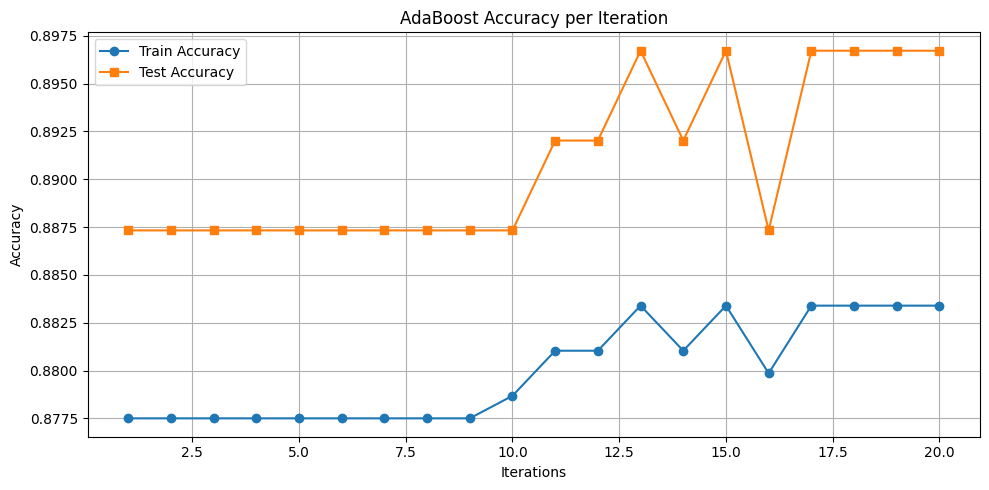

In [35]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#training with AdaBoost in 20 iteration
ada = AdaBoostClassifier(n_estimators=20, random_state=42)
ada.fit(X_train_vec, y_train)

#here storing accuracy
train_acc = []
test_acc = []

#calculate accuracy at each iteration
for train_pred, test_pred in zip(ada.staged_predict(X_train_vec), ada.staged_predict(X_test_vec)):
    train_acc.append(accuracy_score(y_train, train_pred))
    test_acc.append(accuracy_score(y_test, test_pred))

# graph ploting of accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), train_acc, marker='o', label='Train Accuracy')
plt.plot(range(1, 21), test_acc, marker='s', label='Test Accuracy')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("AdaBoost Accuracy per Iteration")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


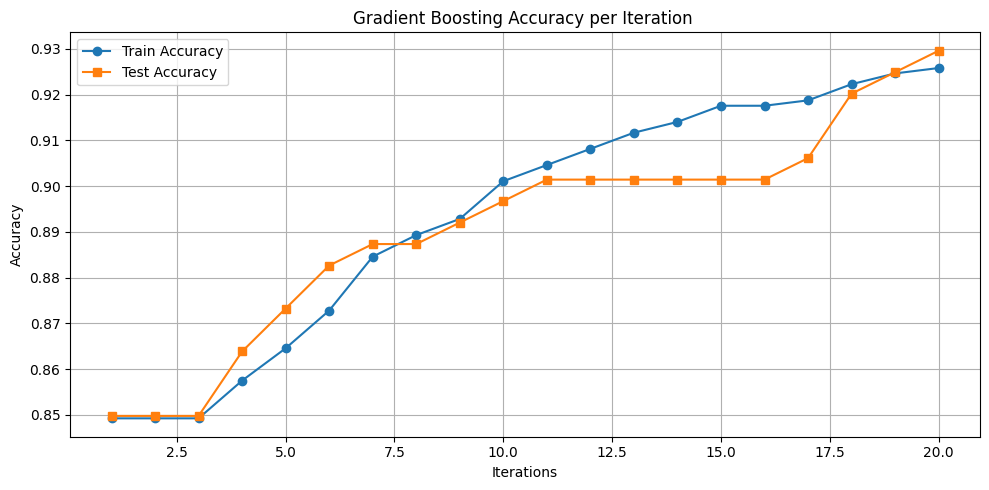

In [37]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# training with Gradient Boosting in 20 iterations
gb = GradientBoostingClassifier(n_estimators=20, random_state=42)
gb.fit(X_train_vec, y_train)

# storing accuracy of each iteration
gb_train_acc = []
gb_test_acc = []

for train_pred, test_pred in zip(gb.staged_predict(X_train_vec), gb.staged_predict(X_test_vec)):
    gb_train_acc.append(accuracy_score(y_train, train_pred))
    gb_test_acc.append(accuracy_score(y_test, test_pred))

# plotting iteration wise accuracy
plt.figure(figsize=(10, 5))
plt.plot(range(1, 21), gb_train_acc, marker='o', label='Train Accuracy')
plt.plot(range(1, 21), gb_test_acc, marker='s', label='Test Accuracy')
plt.xlabel("Iterations")
plt.ylabel("Accuracy")
plt.title("Gradient Boosting Accuracy per Iteration ")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# here it is initializzation of Random Forest model wihtout interation its in parallel
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# training the model
rf.fit(X_train_vec, y_train)

# prediction on test data
y_pred_rf = rf.predict(X_test_vec)

# evalution of performance
print("Random Forest Classification Report:\n")
print(classification_report(y_test, y_pred_rf))

# print overall accuracy using random forest
print("Random Forest Test Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.97      1.00      0.99       181
           1       1.00      0.84      0.92        32

    accuracy                           0.98       213
   macro avg       0.99      0.92      0.95       213
weighted avg       0.98      0.98      0.98       213

Random Forest Test Accuracy: 0.9765258215962441


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

# string here predictions
ada_pred = ada.predict(X_test_vec)
gb_pred = gb.predict(X_test_vec)
rf_pred = rf.predict(X_test_vec)

# define function for extracting metrics
def get_metrics(y_true, y_pred):
    return {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }

# collect metrics
results = {
    'AdaBoost': get_metrics(y_test, ada_pred),
    'GradientBoosting': get_metrics(y_test, gb_pred),
    'RandomForest': get_metrics(y_test, rf_pred)
}

# Convert above metrics to dataframe
results_df = pd.DataFrame(results).T.round(4)

# showing the results
print(" Model Comparison:\n")
print(results_df)


 Model Comparison:

                  Accuracy  Precision  Recall  F1-Score
AdaBoost            0.8967     0.9167  0.3438    0.5000
GradientBoosting    0.9296     1.0000  0.5312    0.6939
RandomForest        0.9765     1.0000  0.8438    0.9153


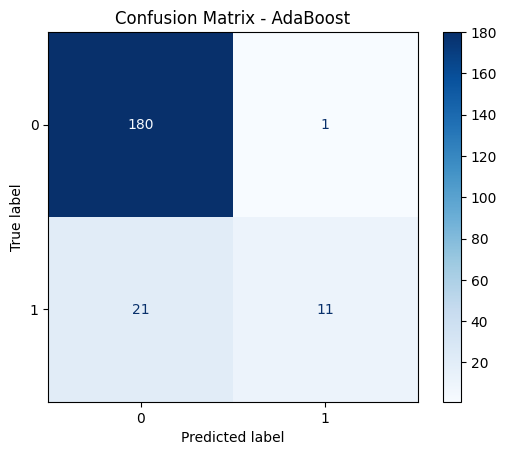

In [40]:
from sklearn.metrics import ConfusionMatrixDisplay

# ploting AdaBoost confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, ada_pred, cmap='Blues')
plt.title("Confusion Matrix - AdaBoost")
plt.grid(False)
plt.show()


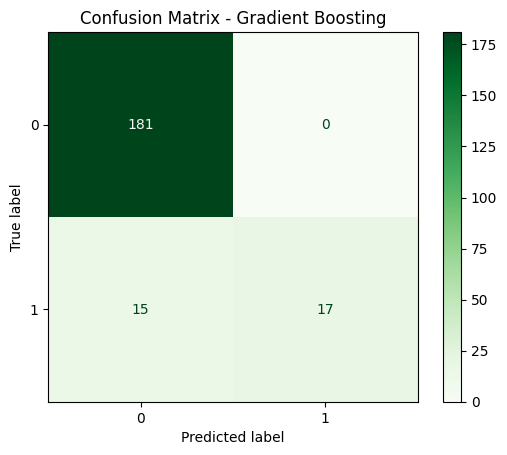

In [41]:
# Plotting Gradient Boosting confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, gb_pred, cmap='Greens')
plt.title("Confusion Matrix - Gradient Boosting")
plt.grid(False)
plt.show()


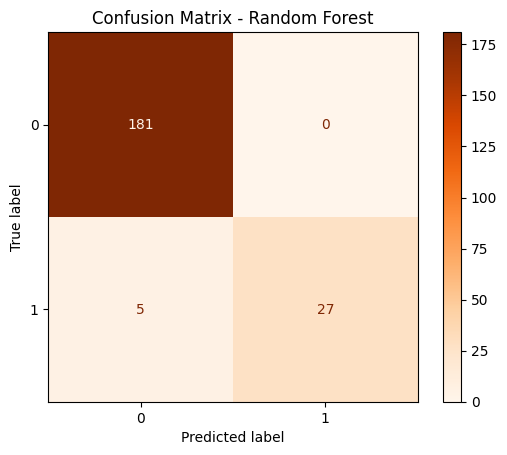

In [42]:
# ploting Random Forest confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, rf_pred, cmap='Oranges')
plt.title("Confusion Matrix - Random Forest")
plt.grid(False)
plt.show()


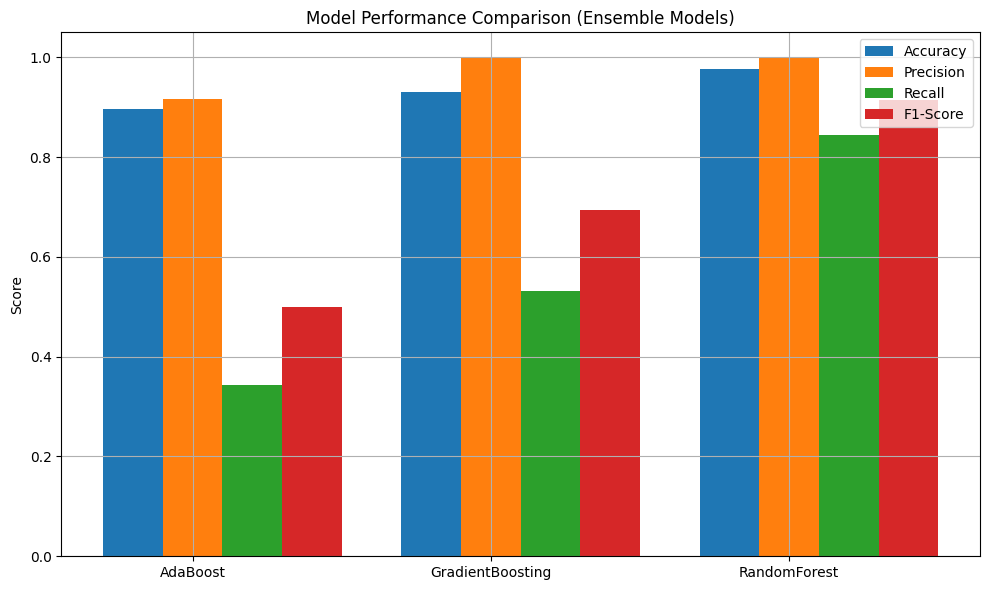

In [43]:
import matplotlib.pyplot as plt

# using again the metrics from prevoius step
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
models = ['AdaBoost', 'GradientBoosting', 'RandomForest']

# Create values for each metric
metric_values = {metric: [results_df.loc[model, metric] for model in models] for metric in metrics}

# plotting each metric as grouped bar chart
x = range(len(models))
bar_width = 0.2

plt.figure(figsize=(10, 6))
for i, metric in enumerate(metrics):
    plt.bar([p + i*bar_width for p in x], metric_values[metric], width=bar_width, label=metric)

# Setting x-axis labels
plt.xticks([p + bar_width for p in x], models)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Ensemble Models)")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
